In [55]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [207]:
from importlib import reload
import ReadFromDB as RDB
reload (RDB)

# from ReadFromDB import create_station_dictionary as csd
# from ReadFromDB import station_dict_row as sdr
# from ReadFromDB import read_weather as rw
# from ReadFromDB import add_times
# from ReadFromDB import print_bikes_stands as pbs
import Authenticator
import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd
import numpy as np
%matplotlib inline

In [153]:
# station = RDB.create_station_dictionary(61)[61]
# if not station.isnull().values.any():
#     station = RDB.add_times(station)
#     RDB.print_bikes_stands(station, 61, day='Mon')
# print(RDB.get_hourly_average(station, "Mon", 9, "both", half="second"))
station2 = RDB.create_station_dictionary(2)

In [84]:
all_stations = RDB.create_station_dictionary(range(2,115))

In [85]:
bike_errors = list()
stands_errors = list()

for i in range(2,116):
    if not i==20:
        print("On station", i)
        station = RDB.add_times(all_stations[i])
        station_dict = RDB.station_dict_row(station, 'last')
        bike_errors.append(station_dict['available_bikes']-RDB.get_hourly_average(station, "Mon", 15, "bikes", half="second"))
        stands_errors.append(station_dict['available_bike_stands']-RDB.get_hourly_average(station, "Mon", 15, "stands", half="second"))
    # print(station_dict['available_bikes'], station_dict['available_bike_stands'])
    # print(RDB.get_hourly_average(station, "Mon", 10, "both", half="first"))

On station 2
On station 3
On station 4
On station 5
On station 6
On station 7
On station 8
On station 9
On station 10
On station 11
On station 12
On station 13
On station 14
On station 15
On station 16
On station 17
On station 18
On station 19
On station 21
On station 22
On station 23
On station 24
On station 25
On station 26
On station 27
On station 28
On station 29
On station 30
On station 31
On station 32
On station 33
On station 34
On station 35
On station 36
On station 37
On station 38
On station 39
On station 40
On station 41
On station 42
On station 43
On station 44
On station 45
On station 46
On station 47
On station 48
On station 49
On station 50
On station 51
On station 52
On station 53
On station 54
On station 55
On station 56
On station 57
On station 58
On station 59
On station 60
On station 61
On station 62
On station 63
On station 64
On station 65
On station 66
On station 67
On station 68
On station 69
On station 70
On station 71
On station 72
On station 73
On station 74


In [86]:
bike_mse = np.mean(bike_errors)**2
stands_mse = np.mean(stands_errors)**2
print("MSE Bikes:", bike_mse)
print("RMSE Bikes:", np.sqrt(bike_mse))
print("MSE Stands:", stands_mse)
print("RMSE Stands:", np.sqrt(stands_mse))

MSE Bikes: 0.002047662277527568
RMSE Bikes: 0.04525110250068575
MSE Stands: 0.032943048068046384
RMSE Stands: 0.18150219852124763


In [91]:
bike_errors_sq = list()
stand_errors_sq = list()
for i in bike_errors:
    bike_errors_sq.append(i**2)
for i in stands_errors:
    stand_errors_sq.append(i**2)

In [94]:
print("MSE Bikes:", np.mean(bike_errors_sq))
print("RMSE Bikes:", np.sqrt(np.mean(bike_errors_sq)))
print("MSE Stands:", np.mean(stand_errors_sq))
print("RMSE Stands:", np.sqrt(np.mean(stand_errors_sq)))

MSE Bikes: 29.96866847049059
RMSE Bikes: 5.474364663638201
MSE Stands: 29.0602137981958
RMSE Stands: 5.3907526189017245


(0, 115)

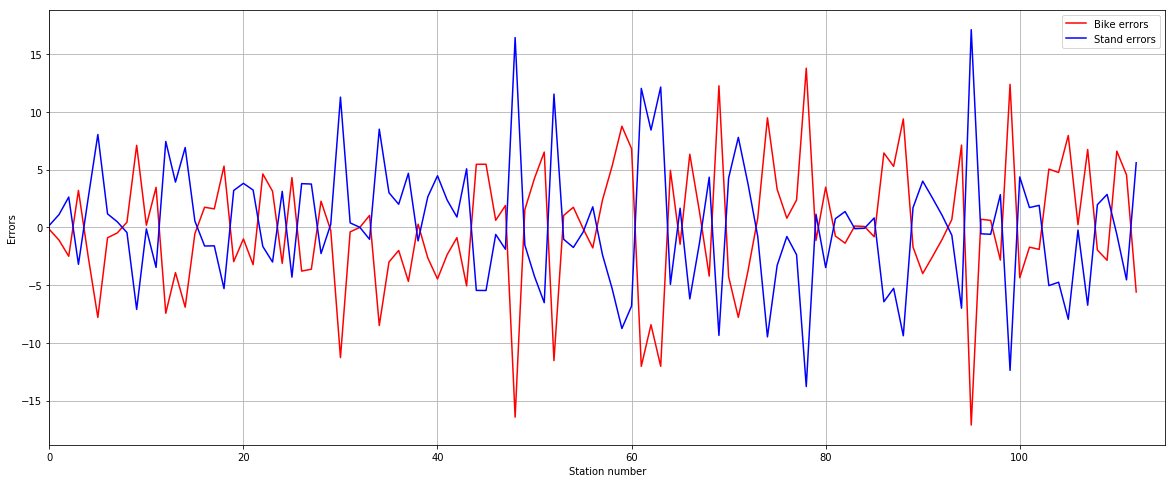

In [110]:
plt.figure(figsize=(20,8))
plt.plot(bike_errors, 'r-', label='Bike errors')
plt.plot(stands_errors, 'b-', label='Stand errors')
plt.legend(loc='best')
plt.grid(True, which='both')
plt.xlabel('Station number')
plt.ylabel('Errors')
plt.xlim(0,115)

In [78]:
test_stations = RDB.create_station_dictionary(2)

In [80]:
test_stations = RDB.add_times(test_stations[2])

In [82]:
testing = RDB.station_dict_row(test_stations, 'last')
testing

{'status': 'OPEN',
 'bike_stands': 20,
 'available_bike_stands': 19,
 'available_bikes': 1,
 'last_updated': 1554735100,
 'date': '04/08/19',
 'day': 'Mon',
 'hour': 15,
 'minute': 51,
 'second': 40,
 'first_half_hour': False,
 'second_half_hour': True}

In [83]:
RDB.get_hourly_average(test_stations, "Mon", 15, "bikes", half="second")

C:\Users\Daniel\Documents\MSc\Semester 2\Software Engineering Project\main\ReadFromDB.py:319: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  hourly_bikes_avg = np.mean(df[df.hour == hour][df.day == str(day)][df.second_half_hour].available_bikes)
C:\Users\Daniel\Documents\MSc\Semester 2\Software Engineering Project\main\ReadFromDB.py:320: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  hourly_stands_avg = np.mean(df[df.hour == hour][df.day == str(day)][df.second_half_hour].available_bike_stands)


1.173913043478261

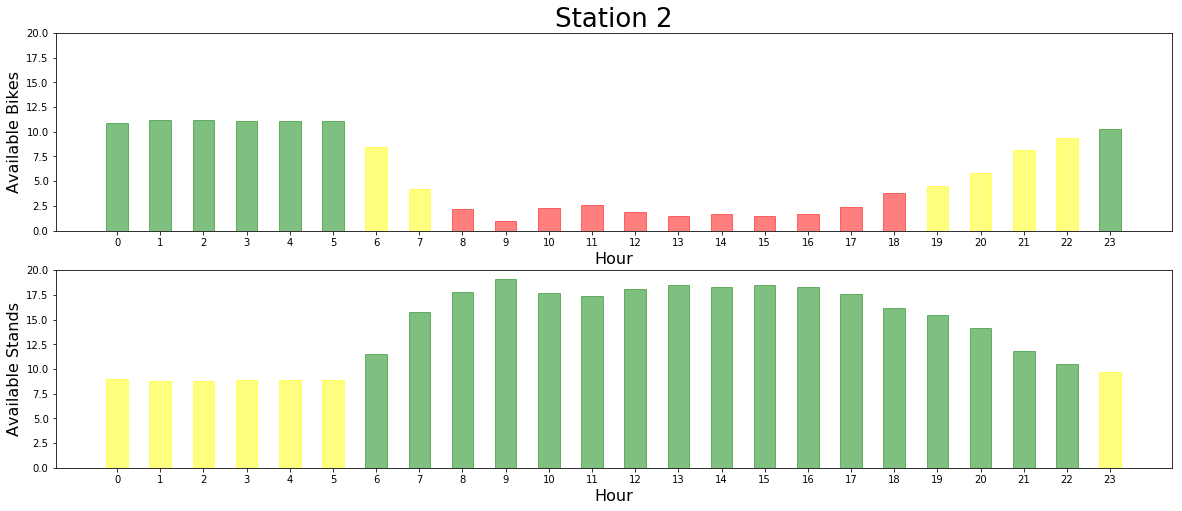

In [109]:
station_2 = RDB.create_station_dictionary(2)[2]
station_2 = RDB.add_times(station_2, reindex=True)
RDB.print_bikes_stands(station_2, 2)

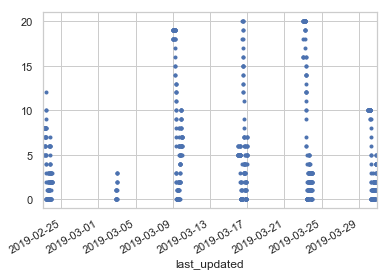

In [332]:
station_2[station_2.day=='Sat'].available_bikes.plot(style='.')

In [87]:
weather_stuff = RDB.read_weather(13)

In [88]:
updated_times = RDB.weather_times(weather_stuff)

In [89]:
updated_times

apparentTemperature  cloudCover  dewPoint  humidity  \
0                   12.42        0.75      5.72      0.64   
1                   12.52        0.75      5.74      0.63   
2                   12.12        0.75      5.91      0.66   
3                   12.07        0.75      5.89      0.66   
4                   12.07        0.75      5.89      0.66   
5                   12.06        0.75      5.89      0.66   
6                   11.96        0.75      5.86      0.66   
7                   11.84        0.75      5.83      0.67   
8                   11.29        0.76      6.13      0.71   
9                   11.18        0.76      6.09      0.71   
10                  11.08        0.76      6.06      0.71   
11                  10.99        0.76      6.03      0.71   
12                  10.89        0.76      6.01      0.72   
13                  10.81        0.75      5.98      0.72   
14                  10.71        0.75      5.95      0.72   
15                  10.62        0.75      5.92      0.73   
16                  10.53        0.75      5.89      0.73   
17                  10.44        0.74      5.87      0.73   
18                  10.34        0.74      5.83      0.74   
19                  10.26        0.74      5.81      0.74   
20                  11.11        0.75      6.27      0.72   
21                  11.01        0.75      6.24      0.72   
22                  10.85        0.71      6.23      0.73   
23                  10.78        0.70      6.21      0.73   
24                  10.80        0.69      6.19      0.73   
25                  10.74        0.68      6.18      0.73   
26                  10.67        0.67      6.16      0.74   
27                  10.61        0.66      6.14      0.74   
28                  10.54        0.65      6.13      0.74   
29                  10.48        0.64      6.11      0.74   
...                   ...         ...       ...       ...   
9714                 5.25        0.76      6.29      0.86   
9715                 5.81        0.75      6.41      0.85   
9716                 5.79        0.75      6.39      0.85   
9717                 5.77        0.74      6.37      0.85   
9718                 5.74        0.74      6.35      0.85   
9719                 5.71        0.74      6.33      0.85   
9720                 5.67        0.74      6.31      0.85   
9721                 5.63        0.75      6.28      0.85   
9722                 5.59        0.75      6.26      0.85   
9723                 5.56        0.75      6.24      0.85   
9724                 5.52        0.75      6.22      0.85   
9725                 5.37        0.75      6.19      0.85   
9726                 5.33        0.75      6.17      0.85   
9727                 5.73        0.74      6.29      0.85   
9728                 5.69        0.74      6.27      0.85   
9729                 5.66        0.74      6.24      0.85   
9730                 5.63        0.73      6.22      0.85   
9731                 5.62        0.74      6.20      0.85   
9732                 5.61        0.74      6.18      0.85   
9733                 5.59        0.74      6.16      0.85   
9734                 5.58        0.74      6.14      0.85   
9735                 5.56        0.74      6.12      0.85   
9736                 5.55        0.74      6.09      0.85   
9737                 5.53        0.74      6.07      0.85   
9738                 4.61        0.74      5.29      0.82   
9739                 4.60        0.73      5.27      0.82   
9740                 4.59        0.73      5.25      0.82   
9741                 4.58        0.73      5.23      0.82   
9742                 4.60        0.73      5.21      0.82   
9743                 4.63        0.73      5.20      0.81   

                     icon  nearestStormBearing  nearestStormDistance   ozone  \
0       partly-cloudy-day                304.0                 206.0  283.67   
1       partly-cloudy-day                304.0                 

In [90]:
import HourlyPlots as hp
dataframe = RDB.create_station_dictionary(13)[13]


In [91]:
dataframe = RDB.add_times(dataframe)

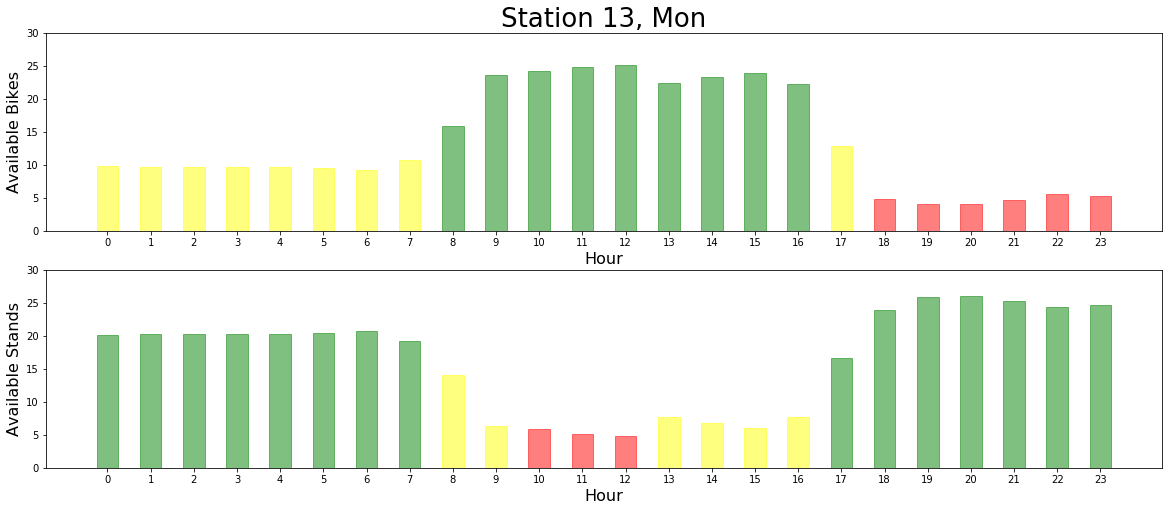

In [92]:
hp.print_bikes_stands(dataframe, 13, day="Mon")

In [208]:
import AveragesModel
reload(AveragesModel)

from AveragesModel import get_hourly_average

In [209]:
# get_hourly_average(dataframe, updated_times, "Tue", 10, 'bikes', half='first')

In [210]:
def prediction(station_number):
    weather_df = RDB.read_weather(station_number)
    weather_times = RDB.weather_times(weather_df)
    station_df = RDB.create_station_dictionary(station_number)[station_number]
    station_times = RDB.add_times(station_df)
    last_row = RDB.station_dict_row(station_times, 'last')
    prediction = get_hourly_average(station_times, weather_times, 15, "bikes", "first")
    error = last_row['available_bikes']-prediction
    return prediction, error

In [212]:
%%time

predictions_3 = list()
errors_3 = list()

for i in range(2,116):
    if not i==20:
        print(i)
        pred, error = prediction(i)
        predictions_3.append(pred)
        errors_3.append(error)

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
Wall time: 18min 32s


In [191]:
for i in errors:
    if abs(i) > 9:
        print(errors.index(i))
errors_test = list()

for i in errors:
    if abs(i)<9:
        errors_test.append(i)


6
22
30
38
51
61
64
65
78
86
87
90
111


In [188]:
errors_sq = [i**2 for i in errors]

In [189]:
np.sqrt(np.mean(errors_sq))

5.542651195977083

In [163]:
np.sqrt(np.mean(errors_sq))

5.846285344021512

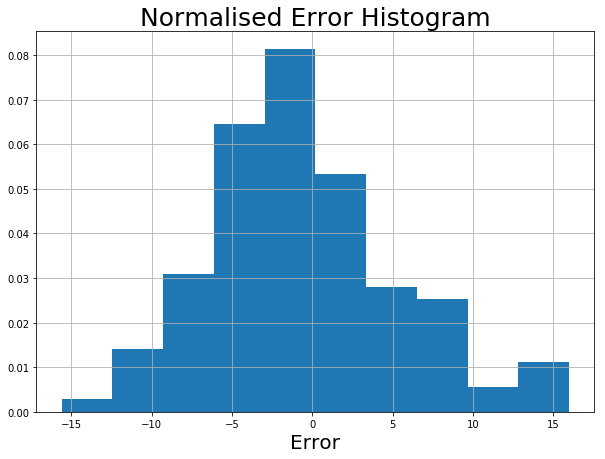

In [175]:
plt.figure(figsize=(10,7))
plt.xlabel('Error', fontsize=20)
plt.title('Normalised Error Histogram', fontsize=25)
plt.hist(errors, density=1)
plt.grid(True, which='both')
plt.show()

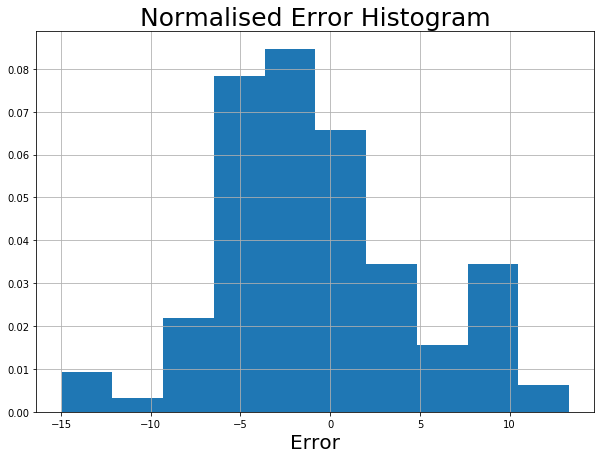

In [190]:
plt.figure(figsize=(10,7))
plt.xlabel('Error', fontsize=20)
plt.title('Normalised Error Histogram', fontsize=25)
plt.hist(errors, density=1)
plt.grid(True, which='both')
plt.show()

In [193]:
test_sq = [i**2 for i in errors_test]

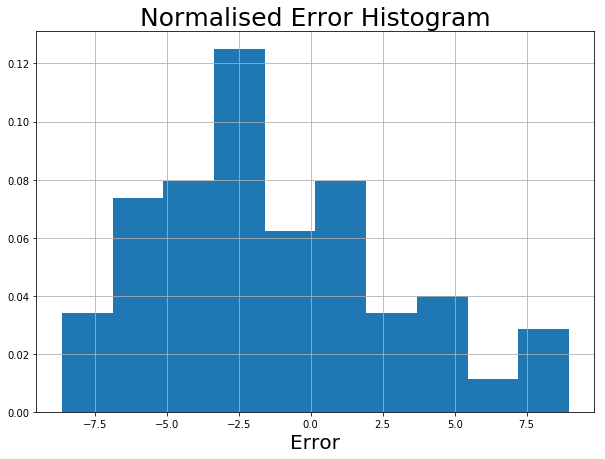

In [196]:
plt.figure(figsize=(10,7))
plt.xlabel('Error', fontsize=20)
plt.title('Normalised Error Histogram', fontsize=25)
plt.hist(errors_test, density=1)
plt.grid(True, which='both')
plt.show()

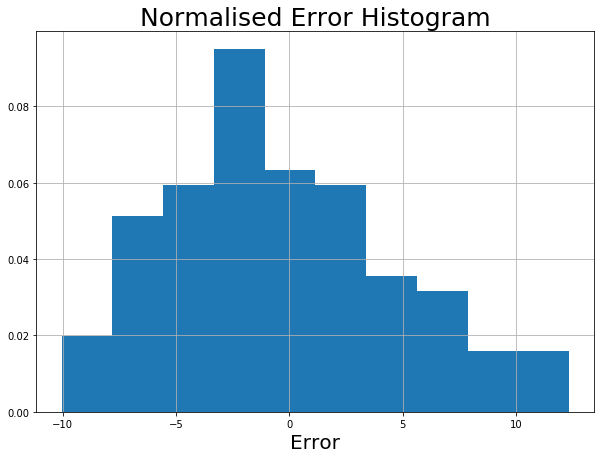

In [214]:
plt.figure(figsize=(10,7))
plt.xlabel('Error', fontsize=20)
plt.title('Normalised Error Histogram', fontsize=25)
plt.hist(errors_3, density=1)
plt.grid(True, which='both')
plt.show()

In [217]:
sq_errors_3 = [i**2 for i in errors_3]
np.mean(sq_errors_3), np.sqrt(np.mean(sq_errors_3))

(25.16133042363781, 5.016107098501567)

In [219]:
for i in errors_3:
    if abs(i) > 9:
        print(errors_3.index(i))

8
22
38
62
64
65
75
78
90
